## Observations and Insights

## Dependencies and starter code

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()
study_results.head()
merge_result = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
merge_result.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = merge_result.groupby(["Drug Regimen"])


#mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

# Creating a summary statistics dataframe
drg_summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

drg_summary_stats

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar plots

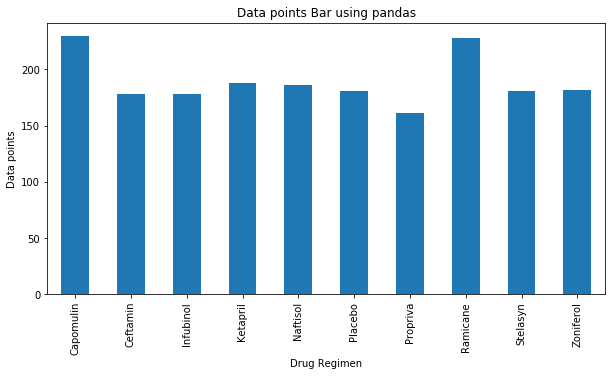

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#groupby 
data_points = merge_result.groupby(["Drug Regimen"]).count()["Mouse ID"]
data_points

data_points.plot(kind="bar",figsize=(10,5))

plt.title("Data points Bar using pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Data points")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

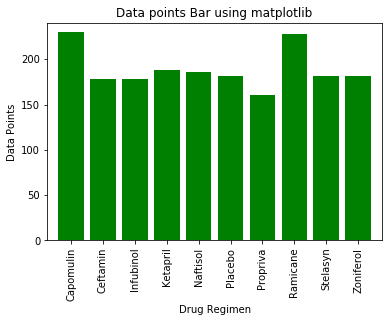

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points

y_datapoint =[230,178,178,188,186,181,161,228,181,182]
x_drugregimen = np.arange(len(data_points))
#print(x_drugregimen)

plt.bar(x_drugregimen,y_datapoint,color='g',align='center')

tick_locations = [value for value in x_drugregimen]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_drugregimen)-0.25)

plt.ylim(0, max(y_datapoint)+10)

plt.title("Data points Bar using matplotlib")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

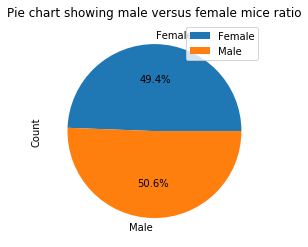

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = pd.DataFrame(merge_result.groupby(["Sex"]).count()).reset_index()
mice_gender.head()
mice_gender = mice_gender[["Sex","Mouse ID"]]
mice_gender = mice_gender.rename(columns={"Mouse ID": "Count"})
mice_gender.head()

mice_gender.plot(kind="pie",y="Count",autopct='%1.1f%%',labels=mice_gender['Sex'])
plt.title("Pie chart showing male versus female mice distribution")
plt.show()                 



Text(0.5, 1.0, 'Pie chart showing male versus female mice distribution')

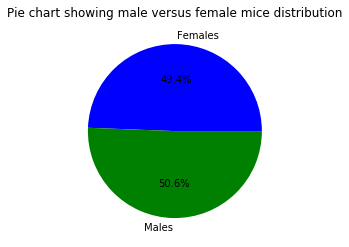

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (merge_result.groupby(["Sex"])['Timepoint'].count()).tolist()
gender_count

labels=["Females","Males"]
colors=["blue","green"]

plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.1f%%",)
plt.title("Pie chart showing male versus female mice distribution")

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
cap_df = merge_result.loc[merge_result["Drug Regimen"] == "Capomulin",:]
ram_df = merge_result.loc[merge_result["Drug Regimen"] == "Ramicane", :]
inf_df = merge_result.loc[merge_result["Drug Regimen"] == "Infubinol", :]
ceft_df = merge_result.loc[merge_result["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

# Capomulin
cap_vol =cap_df.groupby('Mouse ID').max()['Timepoint']
capvol = pd.DataFrame(cap_vol)
capvol.head()
capmerge = pd.merge(capvol, merge_result,on=("Mouse ID","Timepoint"),how="left")
capmerge.head(5)


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     b128         45    Capomulin  Female           9          22   
1     b742         45    Capomulin    Male           7          21   
2     f966         20    Capomulin    Male          16          17   
3     g288         45    Capomulin    Male           3          19   
4     g316         45    Capomulin  Female          22          22   

   Tumor Volume (mm3)  Metastatic Sites  
0           38.982878                 2  
1           38.939633                 0  
2           30.485985                 0  
3           37.074024                 1  
4           40.159220                 2

In [28]:
tumors = capmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
#capomulin_outlier = capmerge.loc[capmerge["Tumor Volume (mm3)"] < 20.70456164999999 and capmerge["Tumor Volume (mm3)"] < 51.83201549]
#capomulin_outlier

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [31]:

ram_vol =ram_df.groupby('Mouse ID').max()['Timepoint']
ramvol = pd.DataFrame(ram_vol)
ramvol.head()
rammerge = pd.merge(ramvol, merge_result,on=("Mouse ID","Timepoint"),how="left")
rammerge.head(5)


tumors_ram = rammerge["Tumor Volume (mm3)"]

quartiles = tumors_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
#capomulin_outlier = capmerge.loc[capmerge["Tumor Volume (mm3)"] < 20.70456164999999 and capmerge["Tumor Volume (mm3)"] < 51.83201549]
#capomulin_outlier

Ramicane potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [68]:
#Infubinol
inf_vol =inf_df.groupby('Mouse ID').max()['Timepoint']
infvol = pd.DataFrame(inf_vol)
infvol.head()
infmerge = pd.merge(infvol, merge_result,on=("Mouse ID","Timepoint"),how="left")
infmerge.head(5)


tumors_inf = infmerge["Tumor Volume (mm3)"]

quartiles = tumors_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
#capomulin_outlier = infmerge.loc[capmerge["Tumor Volume (mm3)"] < 20.70456164999999 and infmerge["Tumor Volume (mm3)"] < 51.83201549]
#capomulin_outlier

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [34]:
#Ceftamin
ceft_vol =ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftvol = pd.DataFrame(ceft_vol)
ceftvol.head()
ceftmerge = pd.merge(ceftvol, merge_result,on=("Mouse ID","Timepoint"),how="left")
ceftmerge.head(5)


tumors_ceft = ceftmerge["Tumor Volume (mm3)"]

quartiles = tumors_ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
#capomulin_outlier = capmerge.loc[capmerge["Tumor Volume (mm3)"] < 20.70456164999999 and capmerge["Tumor Volume (mm3)"] < 51.83201549]
#capomulin_outlier

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

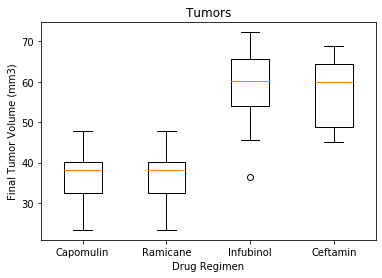

In [36]:
data_to_plot = [tumors, tumors_ram, tumors_inf, tumors_ceft]

fig1, ax1 = plt.subplots()
ax1.set_title('Box plot for the drug regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

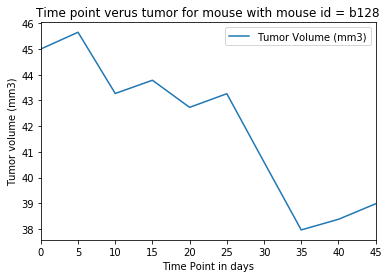

In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_vol_timepoint =cap_df.loc[cap_df["Mouse ID"]== "b128"]
cap_vol_timepoint
timepoint_tumor_df = cap_vol_timepoint[["Timepoint","Tumor Volume (mm3)"]]

timepoint_tumor_df.plot.line(x="Timepoint",y="Tumor Volume (mm3)")
plt.title("Time point verus tumor for mouse treated with capomulin with mouse id = b128")
plt.xlabel("Time Point in days")
plt.ylabel("Tumor volume (mm3)")
plt.savefig("lineplot")

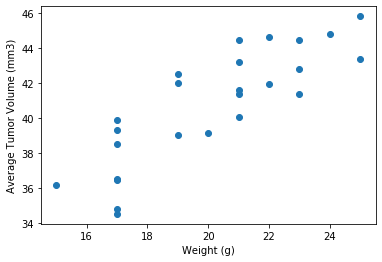

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
capavg.head()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

In [60]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


y = 0.95x + 21.55
The r-squared is: 0.8419363424694719


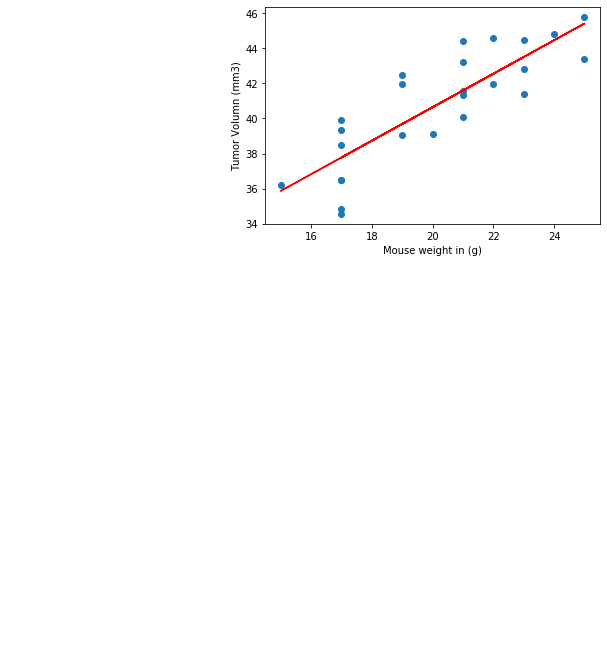

In [72]:
x_values = capavg['Weight (g)']
y_values = capavg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(line_eq)
plt.annotate(line_eq,(6,10),fontsize=15,color="green") #couldnt figure out why the equation is not being shown in the graph
plt.xlabel('Mouse weight in (g)')
plt.ylabel('Tumor Volumn (mm3)')
print(f"The r-squared is: {rvalue}")
plt.savefig('line_regression')
plt.show()